In [1]:

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model
import seaborn as sns

%matplotlib inline

In [53]:
dataOriginal = pd.read_csv('stock.csv')
data = dataOriginal.copy()
data.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [54]:
x = data['sp500'].pct_change()
y = data['GOOG'].pct_change()
print(x.head())
print(y.head())


0         NaN
1   -0.004948
2    0.003553
3    0.011108
4    0.004939
Name: sp500, dtype: float64
0         NaN
1   -0.007385
2    0.005744
3    0.006889
4    0.010523
Name: GOOG, dtype: float64


In [55]:
x.dropna(inplace=True, ignore_index=True)
y.dropna(inplace=True, ignore_index=True)
print(x.head())
print(y.head())


0   -0.004948
1    0.003553
2    0.011108
3    0.004939
4    0.000669
Name: sp500, dtype: float64
0   -0.007385
1    0.005744
2    0.006889
3    0.010523
4   -0.083775
Name: GOOG, dtype: float64


Text(0, 0.5, '$\\Delta$ GOOG')

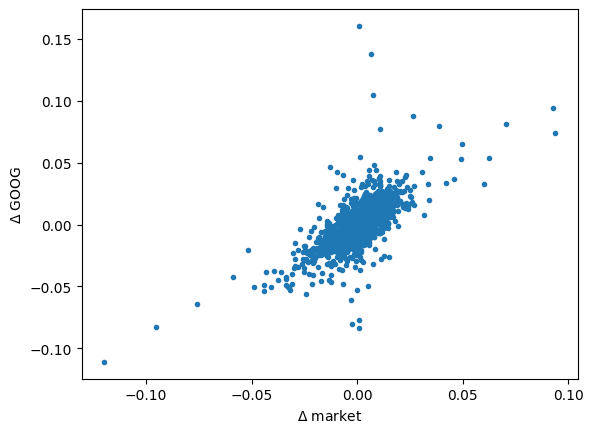

In [56]:
plt.plot(x.to_numpy(), y.to_numpy(), '.')
plt.xlabel('$\Delta$ market')
plt.ylabel('$\Delta$ GOOG')

In [57]:
xreg = x.values.reshape(-1,1)
yreg = y.values.reshape(-1,1)
reg = linear_model.LinearRegression().fit(xreg,yreg)


In [58]:
reg.coef_

array([[1.03488108]])

In [59]:
reg.intercept_

array([0.00033371])

beta is [[1.03488108]]
R2 value is 0.46863810192643307


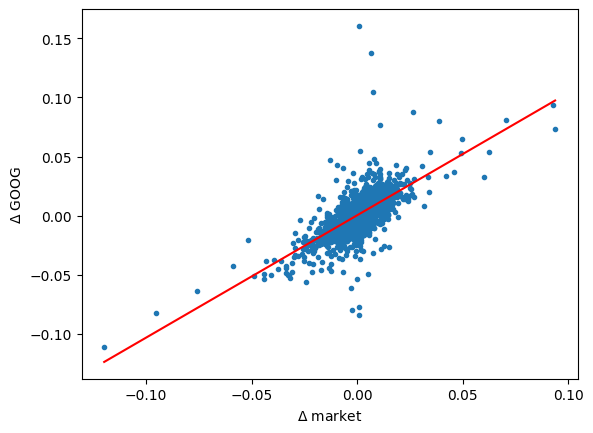

In [61]:
plt.plot(xreg, yreg, '.')
x_line = np.linspace(np.min(xreg), np.max(xreg), len(xreg))
x_line = x_line.reshape(-1,1)
plt.plot(x_line, reg.coef_*x_line+reg.intercept_, 'r')
plt.xlabel('$\Delta$ market')
plt.ylabel('$\Delta$ GOOG')
print('beta is {}'.format(reg.coef_))
print('R2 value is {}'.format(reg.score(xreg,yreg))) 